In [1]:
#include "FormFactor_transform_resolution_add_wedge_1D.h"

### Parameters for functions below

In [ ]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7;
double bins = 1000, r_min = 0, r_max = 15;
double phi_min = 0, phi_max = pi/9, sigma = 0.1;

// Initialize constructor
FormFactor_transform_resolution_add_wedge_1D ff_trans_wResCut(A,Vo,R,a0,bins,phi_min,phi_max,sigma,r_min,r_max);

### Compare transformation of form factor with Woods-Saxon distribution and with resolution and wedge cuts

In [1]:
TF1 *ff_transform_wResCut = ff_wResCut.getWedgeResTransform_fun_1D();
    ff_transform_wResCut->SetTitle("Plot |F(t)|^{2} -> G(r) with Resolution and #pi/9 Wedge Cut Transformation");
    ff_transform_wResCut->GetYaxis()->SetTitle("G(r) [fm^{-3}]");
    ff_transform_wResCut->GetXaxis()->SetTitle("r [fm]");
    ff_transform_wResCut->Draw();

input_line_43:2:3: error: use of undeclared identifier 'ff_wResCut'
 (ff_wResCut.getWedgeResTransform_fun_1D())
  ^
Error in <HandleInterpreterException>: Error evaluating expression (ff_wResCut.getWedgeResTransform_fun_1D())
Execution of your code was aborted.


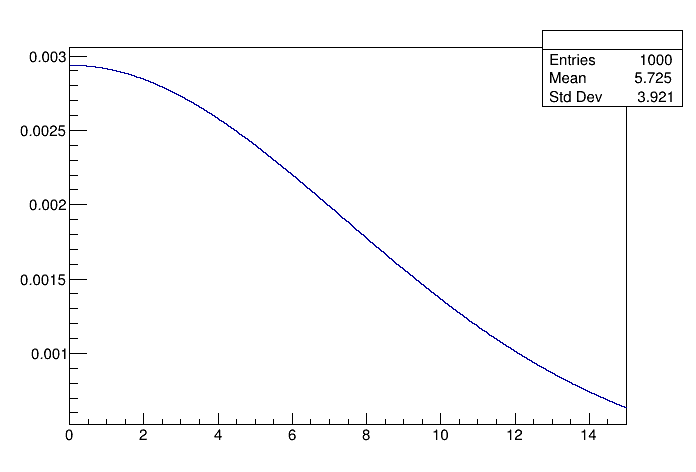

In [5]:
c1->Draw();

In [1]:
#include "FormFactor_t_1D.h"
#include "WoodsSaxon_1D.h"

WoodsSaxon_1D ws_1d(Vo,R,a,r_min,r_max,bins,t_min,t_max);
FormFactor_t_1D ff_1d(A,Vo,R,a0,t_min,t_max,bins,r_min,r_max);

In file included from input_line_42:2:
/home/macink/miniconda3/envs/bnl_research/macros/FormFactor_t_1D.h:54:44: error: cannot initialize an array element of type 'void *' with an rvalue of type 'const double *'
            return trans_integral.Integral(qq_min, qq_max, 1e-12);
                                           ^~~~~~
/home/macink/miniconda3/envs/bnl_research/macros/FormFactor_t_1D.h:54:52: error: cannot initialize an array element of type 'void *' with an rvalue of type 'const double *'
            return trans_integral.Integral(qq_min, qq_max, 1e-12);
                                                   ^~~~~~
/home/macink/miniconda3/envs/bnl_research/macros/FormFactor_t_1D.h:49:25: error: cannot initialize a parameter of type 'cling::runtime::internal::DynamicExprInfo *' with an rvalue of type 'TF1 *'
        transform_TF1 = new TF1("Fourier-Bessel Transformation: |F(t)|^{2} -> G(r)", [this, qq_min, qq_max] (double *var, double *par)
                        ^~~~~~~~~~~~~~~~~~

In [ ]:
TF1 *ws_fun = ws_1d.getWoodsSaxon1D();
    double trueWSIntegral = ws_fun->Integral(ws_fun->GetXmin(), ws_fun->GetXmax());
    TF1 *normalizedTrueWS = new TF1("", [ws_fun, trueWSIntegral](double *x, double *par) 
    {
        return ws_fun->Eval(x[0]) / trueWSIntegral;
    }, ws_fun->GetXmin(), ws_fun->GetXmax(), 0);
    normalizedTrueWS->SetTitle("Fourier-Bessel Transformation from |F(t)|^{2} to G(r)");
    normalizedTrueWS->GetYaxis()->SetTitle("G(r) [fm^{-3}");
    normalizedTrueWS->GetXaxis()->SetTitle("r [fm]");
    normalizedTrueWS->SetLineStyle(2);
    normalizedTrueWS->SetLineColor(kBlack);
    normalizedTrueWS->Draw();

TF1 *transformed_ff = ff_1d.getTransformedFF_TF1();
    double transformedFFIntegral = transformed_ff->Integral(transformed_ff->GetXmin(), transformed_ff->GetXmax());
    TF1 *normalizedTransformedFF = new TF1("", [transformed_ff, transformedFFIntegral](double *x, double *par) 
    {
        return transformed_ff->Eval(x[0]) / transformedFFIntegral;
    }, transformed_ff->GetXmin(), transformed_ff->GetXmax(), 0);
    normalizedTransformedFF->SetLineStyle(4);
    normalizedTransformedFF->SetLineColor(kOrange);
    normalizedTransformedFF->Draw("same");

TF1 *ff_transform_wResCut2 = ff_wResCut.getWedgeResTransform_fun_1D();
    double transFFIntegral = ff_transform_wResCut2->Integral(ff_transform_wResCut2->GetXmin(), ff_transform_wResCut2->GetXmax());
    TF1 *normalizedTransFF = new TF1("", [ff_transform_wResCut2, transFFIntegral](double *x, double *par) 
    {
        return ff_transform_wResCut2->Eval(x[0]) / transFFIntegral;
    }, ff_transform_wResCut2->GetXmin(), ff_transform_wResCut2->GetXmax(), 0);
    normalizedTransFF->SetLineStyle(10);
    normalizedTransFF->SetLineColor(kRed);
    normalizedTransFF->Draw();

auto legend = new TLegend(0.63,0.75,0.9,0.9);
	legend->AddEntry(normalizedTrueWS,"True Woods-Saxon","l");
    legend->AddEntry(normalizedTransformedFF,"Transformed True Form Factor","l");
    legend->AddEntry(normalizedTransFF,"Transformed FF with Added Resolution and Wedge Cut","l");
    legend->Draw();

c1->Draw();

### Compare histograms transformation of form factor with Woods-Saxon distribution and with resolution and wedge cuts

In [ ]:
TH1D *transformed_ff_wResCut = ff_wResCut.getWedgeResTransform_hist_1D();
    ftransformed_ff_wResCut->SetTitle("Histogram of |F(t)|^{2} with Resolution and #pi/9 Wedge Cut");
    transformed_ff_wResCut->GetYaxis()->SetTitle("|F(t)|^{2}");
    transformed_ff_wResCut->GetXaxis()->SetTitle("t [GeV^{2}]");
    transformed_ff_wResCut->Scale(197./transformed_ff_wResCut->Integral(), "width");
    transformed_ff_wResCut->SetLineStyle(10);
    transformed_ff_wResCut->SetLineColor(kRed);
    transformed_ff_wResCut->Draw();

TH1D *ff_hist_5 = ff_1d.getTransformedFF_hist();
    ff_hist_5->SetTitle("Histogram of |F(t)|^{2} with Resolution and #pi/9 Wedge Cut");
    ff_hist_5->GetYaxis()->SetTitle("|F(t)|^{2}");
    ff_hist_5->GetXaxis()->SetTitle("t [GeV^{2}]");
    ff_hist_5->SetLineStyle(4);
    ff_hist_5->SetLineColor(kOrange);
    ff_hist_5->Scale(197./ff_hist_5->Integral(), "width");
    ff_hist_5->Draw();

TH1D *ff_hist_50 = ws_1d.getWS_hist();
    ff_hist_50->SetLineStyle(2);
    ff_hist_50->SetLineColor(kBlack);
    ff_hist_50->Scale(197./ff_hist_50->Integral(), "width");
    ff_hist_50->Draw("same");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
	legend->AddEntry(ff_hist_5,"True Woods-Saxon","l");
    legend->AddEntry(ff_hist_50,"Transformed True Form Factor","l");
    legend->AddEntry(transformed_ff_wResCut,"Transformed FF with Added Resolution and Wedge Cut","l");
    legend->Draw();

gPad->SetLogy(0);
gStyle->SetOptStat(0);
c1->Draw();